<img style="float: left;" src="https://github.com/snibborevets/ac209a_anomaly/blob/master/webpage_banner.jpg">

*Website Links:*

In [49]:
HTML('''<select onChange="window.location.href=this.value">
               <option value = "overview.html">Overview</option>
               <option value = "key_concepts.html">Key Concepts</option>
               <option value = "simple_anomaly_detection.html">Simple Anomaly Detection</option>
               <option value = "deterministic_power_martingales.html">Deterministic Power Martingales</option>
               <option value = "randomized_power_martingales.html">Randomized Power Martingales</option>
               <option value = "adiabatic_SVM.html">Adiabatic Iterative Support Vector Machines</option>
               <option value = "conclusion.html">Conclusion</option>
               <option value = "works_cited.html">Works Cited</option>
               <option value = "poster_presentation.html">Poster Presentation</option>
             </select>''')

# Simple Anomaly Detection

- [Luminol Anomaly Detection Package](#Luminol-Anomaly-Detection-Package)
- [Implemention of Luminol Package](#Implemention-of-Luminol-Package)
- [Discussion](#Discussion)

---

In [48]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

---

***Import Libraries***

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import datetime
%matplotlib inline

from scipy.spatial.distance import euclidean
from sklearn.svm import OneClassSVM
from sklearn.cluster import MiniBatchKMeans
from luminol import *
from luminol.modules.time_series import TimeSeries
from luminol.anomaly_detector import AnomalyDetector

---

### Luminol Anomaly Detection Package

The python luminol package contains a simple anomaly detection algorithm: https://pypi.python.org/pypi/luminol/. It computes a value proportional to the absolute value of the first derivate of the underlying sample. Thus, a sudden change in our underlying sample data will yield spikes in the luminol algorithm.

Below we test this package on three time-series data sets: Daily S&P 500 index, Annual Change in Earth's Rotation, and Annual Rainfall in Fortaleza, Brazil. While these are simple 1-dimensional datasets, this method for detecting anomalies proves effective. This is especially evident in the S&P 500 index where spikes in our anomaly algorithm occur at known, drastic market events: the crash of 1987, the dot.com bubble, the Great Recession. 



**FUNCTION: Detect Anomalies in Data Using Luminol Package**

In [10]:
# FXN:  input: time-series data, y
#       output: anomaly index

def anomaly_detector(y):
    
    # convert y-values to dictionary object and...
    y_dict = y.to_dict()
    
    # ...convert to luminol TimeSeries object
    ts = TimeSeries(y_dict)

    # run luminol's AnomalyDetector on time-series data
    anomaly_dect = AnomalyDetector(ts, algorithm_name='derivative_detector')
    
    # get anomaly index scores
    scores = anomaly_dect.get_all_scores().values
    
    # return anomaly index scores
    return scores

**FUNCTION: Plot Anomalies & Underlying Time-Series Data**

In [11]:
# FXN:  input: time axis (x), time-series data (y1), anomaly index scores (y2), and attributes for chart labelling and scaling
#       output: chart with two y-axes, left for underlying data and right for anomaly index

def plot_anomalies(time_axis, time_series_data, anom_scores, anom_min, anom_max, y_label, title):

    # create plot
    fig, ax1 = plt.subplots(figsize=(8,5))

    # create y2 axis with same x-axis
    ax2 = ax1.twinx()
    
    # plot underlying data and anomaly index versus over time
    ax1.plot(time_axis, time_series_data, 'g-')
    ax2.plot(time_axis, anom_scores, 'b-')
    
    # set chart attributes
    ax1.set_title(title)
    ax1.title.set_position([.5, 1.05])
    ax1.set_xlabel('Year')
    ax1.set_ylabel(y_label, color='g')
    ax2.set_ylabel('Anomaly Score', color='b')
    ax2.set_ylim([anom_min, anom_max])

    # display chart 
    plt.show()

---

### Implemention of Luminol Package

**LOAD DATA & PLOT ANOMALIES: S&P 500 Index per Year**

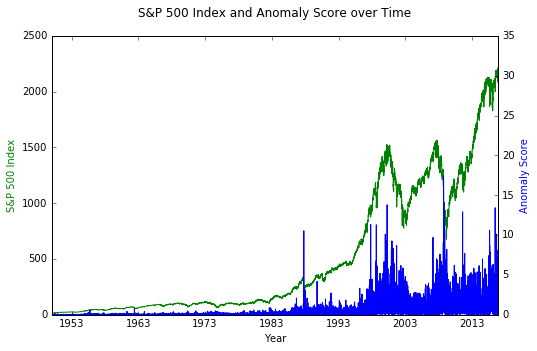

In [12]:
#load data
df_raw_SPX = pd.read_csv('SPX_010350_120516.csv')

# raw data is in reverse-chronological order...so reverse the entire data set
df_SPX = df_raw_SPX.iloc[::-1]
df_SPX.reset_index(drop=True, inplace=True)

# create time axis and convert to datetime format for graphing purposes
date_raw_SPX = df_SPX.iloc[:, 0]
date_SPX = pd.to_datetime(date_raw_SPX)

# create x- and y- datasets
x_SPX = df_SPX.iloc[:,1:-1];
y_SPX = df_SPX.iloc[:,-1];

# run anomaly_detector function on our y-values
scores_SPX = anomaly_detector(y_SPX)

# generate plot using function above
plot_anomalies(date_SPX, y_SPX, scores_SPX, 0, 35, 'S&P 500 Index', 'S&P 500 Index and Anomaly Score over Time')

**LOAD DATA & PLOT ANOMALIES: Increase of Length of Earth-Day per Year (in microseconds)**

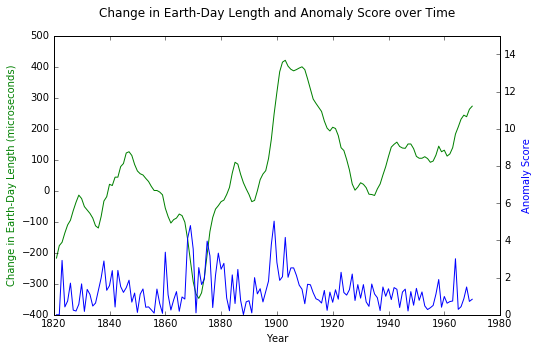

In [13]:
# load data
df_EARTH = pd.read_csv('earth_day_change_per_year_1821_1970.csv')

# get years array associated with dataset
date_EARTH = df_EARTH.iloc[:, 0]

# create x- and y- datasets
x_EARTH = df_EARTH.iloc[:,1:-1];
y_EARTH = df_EARTH.iloc[:,-1];

# run anomaly_detector function on our y-values
scores_EARTH = anomaly_detector(y_EARTH)

# generate plot using function above
plot_anomalies(date_EARTH, y_EARTH, scores_EARTH, 0, 15, 'Change in Earth-Day Length (microseconds)', 'Change in Earth-Day Length and Anomaly Score over Time')

**LOAD DATA & PLOT ANOMALIES: Annual Rainfall in Fortaleza, Brazil (in mm)**

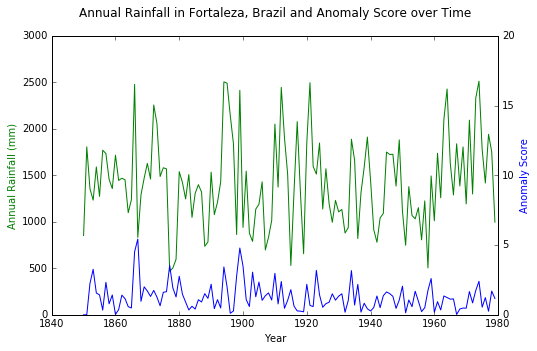

In [14]:
# load data
df_FORTALEZA = pd.read_csv('annual_rainfall_fortaleza_1850_1979.csv')

# get years array associated with dataset
date_FORTALEZA = df_FORTALEZA.iloc[:, 0]

# create x- and y- datasets
x_FORTALEZA = df_FORTALEZA.iloc[:,1:-1];
y_FORTALEZA = df_FORTALEZA.iloc[:,-1];

# run anomaly_detector function on our y-values
scores_FORTALEZA = anomaly_detector(y_FORTALEZA)

# generate plot using function above
plot_anomalies(date_FORTALEZA, y_FORTALEZA, scores_FORTALEZA, 0, 20, 'Annual Rainfall (mm)', 'Annual Rainfall in Fortaleza, Brazil and Anomaly Score over Time')

---

### Discussion

The simple Anomaly Detector algorithm in the luminol package is an effective method for detecting anomalies. As shown above, the anomaly index spikes in value where there are drastic changes (up or down) in the underlying data. 

This methodology, however, has it's shortcomings. First, it does not perform well with cyclical data. While not shown above, our attempts as running AnomalyDetector on monthly weather station temperature readings (over several years) provided poor results. This is not surprising, we we would *expect* to see major fluctuations in temperature throughout each year --- our AnomalyDetector function captures these flucuations as anomalies. 

Second, this method does not work for high dimensional data as it is only concerned with one-time series output. Lastly, the algorithm only considers the "target" sample value and the previous sample value; it does not consider any other previously received data. While this can be considered a plus if performing anomaly detection "on-line", it does not allow for greater precision or flexibility by taking more prior data into account.

---